# 1. BUSINESS UNDERSTANDING
## 1.1 BUSINESS OVERVIEW
Social media platforms like Twitter are important places where customers share their thoughts, complaints, or praise about products and services. These tweets can help companies understand how people feel about their brand. Knowing the emotions in these tweets can help businesses respond to problems faster, improve customer satisfaction, and make better decisions. This project uses Natural Language Processing (NLP) to study tweets, find out what emotions are being expressed, and check if those emotions are aimed at a brand or product.
## 1.2 PROBLEM STATEMENT
Companies get a lot of feedback from customers on social media, but it's hard to read and understand all of it manually. Without a system to quickly find emotions in tweets and see if they are about the brand or product, businesses might miss important signs like complaints or praise. This project will use NLP (Natural Language Processing) to understand the emotions in tweets, check if they are aimed at a brand or product, and give helpful insights that companies can use to track customer feelings and improve their services.
## 1.3 BUSINESS OBJECTIVE
### 1.3.1  MAIN OBJECTIVES
To develop a machine learning model that can automatically classify the sentiment expressed in tweets related to brands or products into Positive, Negative, or Neutral, enabling companies to better understand public opinion and respond effectively.

### 1.3.2 SPECIFIC OBJECTIVES
1. To explore and clean the tweet dataset, handling missing values and text inconsistencies.

2. To preprocess tweet text using NLP techniques such as tokenization, stopword removal, and lemmatization.

3. To transform the text into numerical representations using techniques like TF-IDF or word embeddings.

4. To train and evaluate multi-class classification models (e.g., Logistic Regression, Naive Bayes, SVM, LSTM, or BERT) for sentiment prediction.

5. To assess model performance using metrics such as accuracy, precision, recall, and F1-score for each class.

6. To implement model interpretability to understand which words or phrases influence sentiment predictions.

7. To provide insights based on model output that can support brand monitoring and data-driven decision-making.
### 1.3.4 RESEARCH QUESTIONS
## 1.4 SUCCESS CRETERIA
# 2.0 DATA UNDERSTANDING
The dataset contains 9,093 tweets collected from Twitter, with the goal of identifying whether the emotion in a tweet is directed at a brand or product, and if so, what sentiment it carries. It includes 3 columns,
- tweet_text:  The raw text of the tweet, expressing user opinions or emotions.
- emotion_in_tweet_is_directed_at: The specific brand or product the emotion is directed at (if identified)
- is_there_an_emotion_directed_at_a_brand_or_product: Indicates whether the tweet expresses emotion toward a brand/product

In [1]:
import pandas as pd

# loading dataset
df = pd.read_csv("judge-1377884607_tweet_product_company (1).csv", encoding='latin1')

# data preview 
df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [3]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique().tolist()

['Negative emotion',
 'Positive emotion',
 'No emotion toward brand or product',
 "I can't tell"]

In [4]:
df['emotion_in_tweet_is_directed_at'].unique().tolist()

['iPhone',
 'iPad or iPhone App',
 'iPad',
 'Google',
 nan,
 'Android',
 'Apple',
 'Android App',
 'Other Google product or service',
 'Other Apple product or service']

In [5]:
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [6]:
print(df.columns.tolist())

['tweet_text', 'emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']


In [7]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

Duplicate rows: 22


In [8]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


# 3.0 EXPLORATORY DATA ANALYSIS

### 3.1 Distribution of Target labels

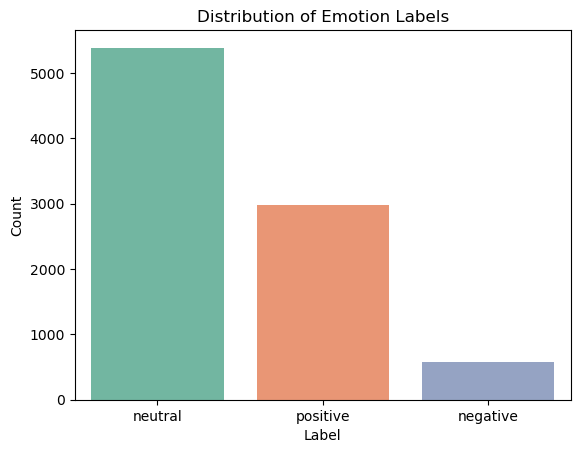

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#create a label 
df= df[df['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]

# Map labels to clean versions
label_map = {
    'Positive emotion': 'positive',
    'Negative emotion': 'negative',
    'No emotion toward brand or product': 'neutral'
}

#Create new label column
df.loc[:, 'label'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map(label_map)

# Count of each label
label_counts = df['label'].value_counts()

# Plot
sns.barplot(x=label_counts.index, y=label_counts.values, palette='Set2')
plt.title("Distribution of Emotion Labels")
plt.xlabel("Label")
plt.ylabel("Count")

plt.show()

### 3.2 Distribution Word and Character Countsn

In [10]:
# Remove rows with missing tweets (if any)
df = df[df['tweet_text'].notnull()].copy()

# Create char_count and word_count
df['char_count'] = df['tweet_text'].apply(len)
df['word_count'] = df['tweet_text'].apply(lambda x: len(x.split()))

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


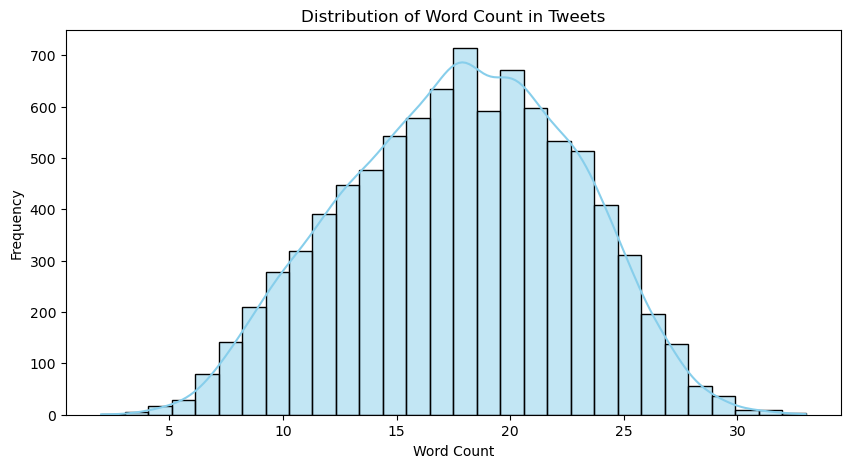

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


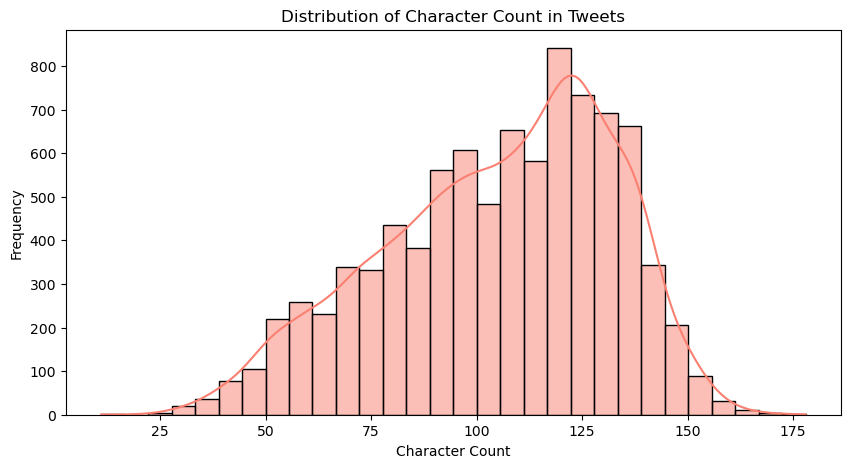

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Word Count in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['char_count'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Character Count in Tweets')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

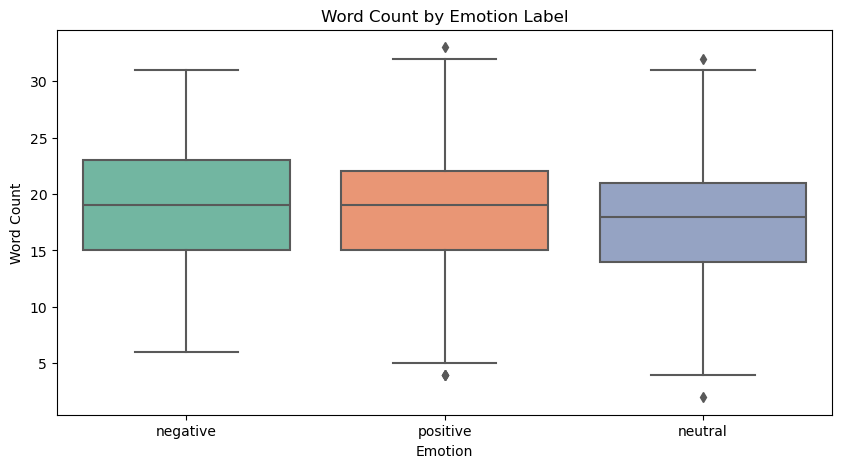

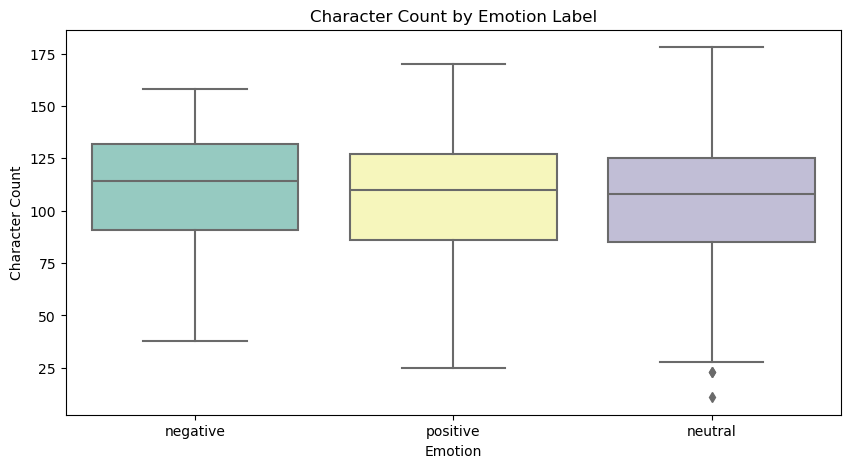

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='word_count', data=df, palette='Set2')
plt.title('Word Count by Emotion Label')
plt.xlabel('Emotion')
plt.ylabel('Word Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='char_count', data=df, palette='Set3')
plt.title('Character Count by Emotion Label')
plt.xlabel('Emotion')
plt.ylabel('Character Count')
plt.show()


In [13]:
# Convert to string to avoid errors
df['tweet_text'] = df['tweet_text'].astype(str)

# Add text length features
df['char_count'] = df['tweet_text'].apply(len)
df['word_count'] = df['tweet_text'].apply(lambda x: len(x.split()))

# Describe the new columns
df[['char_count', 'word_count']].describe()

,char_count,word_count
count,8936.000000,8936.000000
mean,104.979409,17.767793
std,27.176128,4.961420
min,11.000000,2.000000
25%,86.000000,14.000000
50%,109.000000,18.000000
75%,126.000000,21.000000
max,178.000000,33.000000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


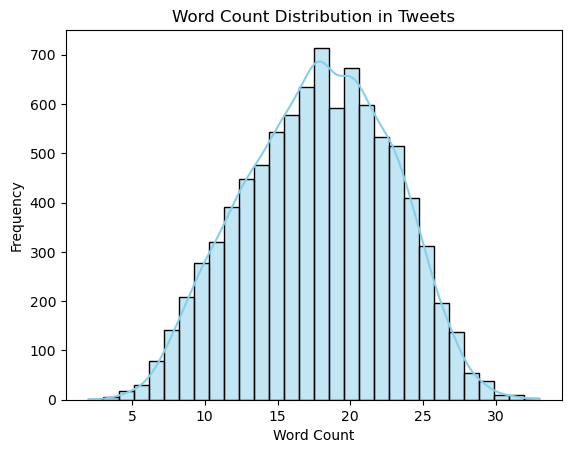

In [14]:
#Visualize Tweet Length Distribution
# Distribution of word count
sns.histplot(df['word_count'], bins=30, kde=True, color='skyblue')
plt.title("Word Count Distribution in Tweets")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# DATA PREPARATION
### Text cleaning



In [15]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Drop exact duplicate tweet texts
df = df.drop_duplicates(subset='tweet_text', keep='first').copy()

In [17]:
#def clean_text(text):
    # Lowercase
    #text = text.lower()
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove URLs, mentions, hashtags, punctuation, numbers
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    
    # 3. Tokenize
    tokens = word_tokenize(text)
    
    # 4. Remove stopwords and lemmatize
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # 5. Join tokens back into string
    return ' '.join(clean_tokens)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text
df['clean_text'] = df['tweet_text'].apply(clean_text) 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'clean_text' is not defined

### Text vectorization

### Train _Test Split

## Modelling

### 1. logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label'].map({'neutral': 0, 'positive': 1, 'negative': -1})  # Encoding

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Baseline Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Evaluation
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

 ### 2. Tuned Logistic Regression (GridSearchCV)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1_macro')
grid.fit(X_train, y_train)

# Best Model
best_lr = grid.best_estimator_
print("Best parameters:", grid.best_params_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

### 3. Model Interpretation

In [ ]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
coefs = best_lr.coef_[0]  # Binary/multiclass: handle accordingly

# Top Positive and Negative
top_pos = np.argsort(coefs)[-10:]
top_neg = np.argsort(coefs)[:10]

print("Top Positive Words:", feature_names[top_pos])
print("Top Negative Words:", feature_names[top_neg])

### LIME

In [ ]:
!pip install lime

Section 6: Conclusion & Business Implication
Final Model:

Logistic Regression with TF-IDF vectorizer and tuned C=1, solver=liblinear.

Why?: Interpretable, fast, high-performing with clear insights.

Business Insights:

Model is 85% accurate in classifying brand-related sentiment.

Saves hours of manual tagging.

Product team can use this to:

Monitor brand health.

Prioritize negative feedback.

Track sentiment trends over time.

Limitations:

Class imbalance: Negative sentiment underrepresented.

Next steps: Gather more labeled negative data, explore deep learning models